# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16392\1050519788.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load the dataset

In [2]:
# change the path of the dataset
data = pd.read_csv('archive/wiki_movie_plots_deduped.csv')
data.head(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [3]:
data.tail(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...
34885,2017,İstanbul Kırmızısı,Turkish,Ferzan Özpetek,"Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...",romantic,https://en.wikipedia.org/wiki/%C4%B0stanbul_K%...,The writer Orhan Şahin returns to İstanbul aft...


In [4]:
data.shape

(34886, 8)

# Exploratory Data Analysis

In [5]:
data.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [6]:
data['Genre'].nunique()

2265

In [7]:
data['Origin/Ethnicity'].nunique()

24

In [8]:
data['Release Year'].nunique()

117

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34881    False
34882    False
34883    False
34884    False
34885    False
Length: 34886, dtype: bool

## Distribution of movies over the years

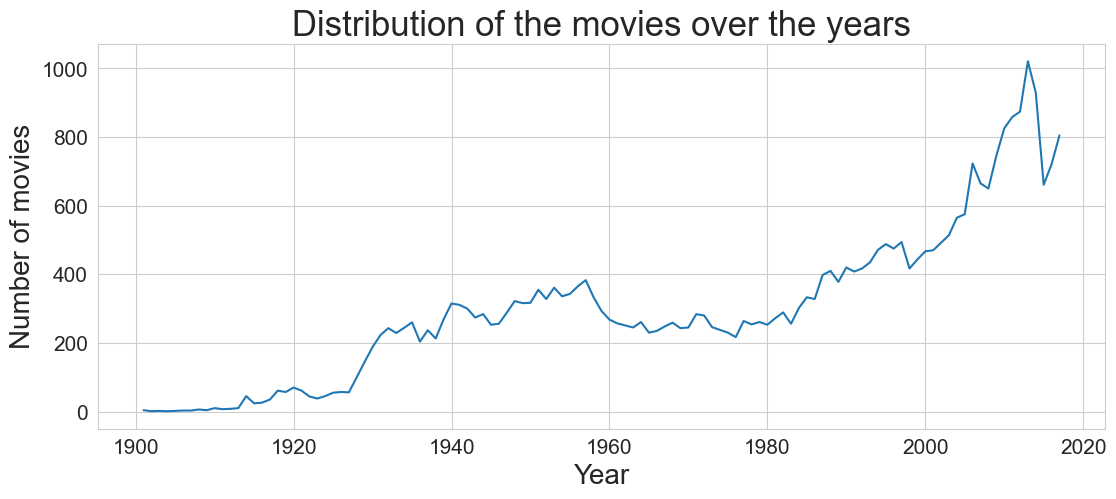

In [10]:
import matplotlib.pyplot as plt

movies_per_year = data['Release Year'].value_counts().sort_index().reset_index()
movies_per_year.columns = ['Release Year' , 'Count']

sns.set_style('whitegrid')
plt.figure(figsize=(13, 5))

sns.lineplot(x='Release Year', y='Count', data=movies_per_year)

plt.title('Distribution of the movies over the years', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of movies', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## Movies origin

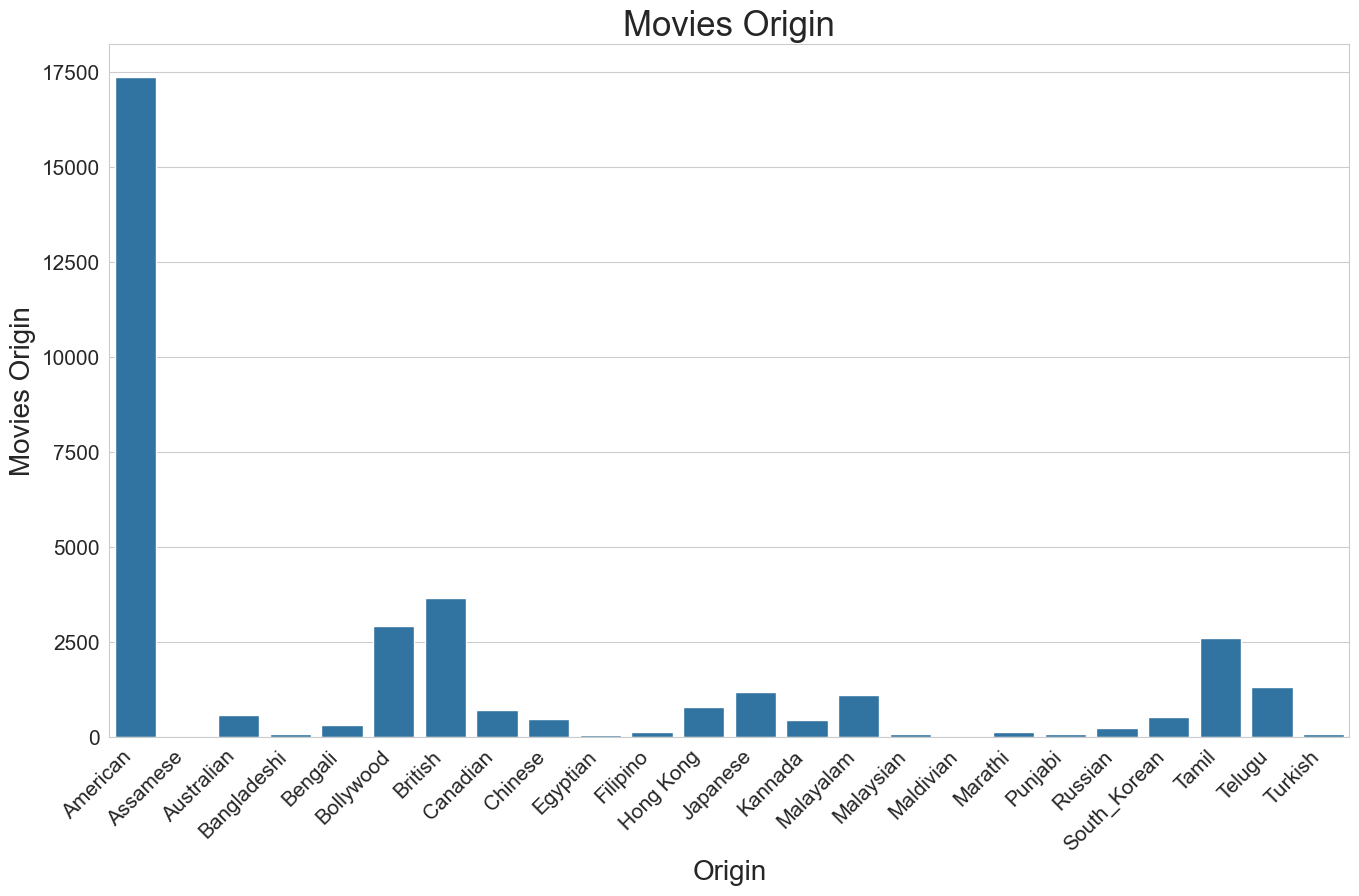

In [11]:
movies_per_origin = data['Origin/Ethnicity'].value_counts().sort_index().reset_index()
movies_per_origin.columns = ['Origin', 'Count']


plt.figure(figsize=(16, 9))


sns.barplot(x='Origin', y='Count', data=movies_per_origin)

plt.title('Movies Origin', fontsize=25)
plt.xlabel('Origin', fontsize=20)
plt.ylabel('Movies Origin', fontsize=20)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.yticks(fontsize=15)

plt.show()


# Data Pre-processing

In [13]:
# Import
import spacy
import string
import gensim
import operator
import re


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [14]:
def text_cleaner(text):
    
    # Remove any characters that are not uppercase letters, lowercase letters, or white space character.
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', text) 
    
    # Replace conecutive spaces with a single space.
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text   

In [15]:
# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Initialize limitizers
lemmatizer = WordNetLemmatizer()

In [16]:
def nltk_tokenizer(text):
    
    # Remove any characters that are not uppercase letters, lowercase letters, or white space character.
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', text) 
    
    # Replace conecutive spaces with a single space.
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    # Creating token objects      
    tokens = word_tokenize(cleaned_text)
    
    
    lowercase_tokens = [token.lower() for token in tokens]
    
    # remove stop words
    filtered_tokens = [token for token in lowercase_tokens if token not in stop_words]
    
    # limitize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    return lemmatized_tokens
    

In [17]:
print("Cleaning and Tokenizing...")

%time data['plot_tokenized'] = data['Plot'].map(lambda x : nltk_tokenizer(x))

data.to_csv('cleaned_movie_plots.csv', index=False)


Cleaning and Tokenizing...
CPU times: total: 39.5 s
Wall time: 1min 44s


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,plot_tokenized
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...","[bartender, working, saloon, serving, drink, c..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...","[moon, painted, smiling, face, hang, park, nig..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...","[film, minute, long, composed, two, shot, firs..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,"[lasting, second, consisting, two, shot, first..."
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"[earliest, known, adaptation, classic, fairyta..."


In [29]:
data.to_csv('cleaned_movie_plots.csv', index=False)

In [18]:
# store tokens separatly 
movie_tokenized = data['plot_tokenized']

# Building Word Dictionary

In [19]:
from gensim import corpora

# Build a dictionary for the tokenizd words
%time dictionary = corpora.Dictionary(movie_tokenized)

CPU times: total: 5.02 s
Wall time: 12.7 s


In [20]:
# Creating a list of lists
dict_tokens = [
    [
        [dictionary[key]
         , dictionary.token2id[dictionary[key]]]
        for key, value in dictionary.items()
        if key <= 50
    ]
]
# Printing the resulting list
print(dict_tokens)


[[['appear', 0], ['assault', 1], ['bar', 2], ['bartender', 3], ['beer', 4], ['begin', 5], ['breaking', 6], ['bucket', 7], ['burst', 8], ['carrie', 9], ['cash', 10], ['customer', 11], ['drink', 12], ['dumping', 13], ['everybody', 14], ['eye', 15], ['face', 16], ['fill', 17], ['fixture', 18], ['follower', 19], ['group', 20], ['hat', 21], ['head', 22], ['inside', 23], ['irish', 24], ['leave', 25], ['man', 26], ['mirror', 27], ['nation', 28], ['order', 29], ['policeman', 30], ['pulling', 31], ['register', 32], ['saloon', 33], ['seltzer', 34], ['serving', 35], ['smashing', 36], ['spray', 37], ['stereotypically', 38], ['water', 39], ['working', 40], ['wrecking', 41], ['bench', 42], ['better', 43], ['bigger', 44], ['blocked', 45], ['causing', 46], ['couple', 47], ['embrace', 48], ['everything', 49], ['fan', 50]]]


# Bag of Words

In [21]:
%time corpus = [dictionary.doc2bow(desc) for desc in movie_tokenized] # Build bag of words for the tokens

CPU times: total: 1.86 s
Wall time: 7.06 s


In [22]:
word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('appear', 1), ('assault', 1), ('bar', 1), ('bartender', 2), ('beer', 2), ('begin', 1), ('breaking', 1), ('bucket', 1), ('burst', 1), ('carrie', 1), ('cash', 1), ('customer', 1), ('drink', 1), ('dumping', 1), ('everybody', 1), ('eye', 1), ('face', 1), ('fill', 1), ('fixture', 1), ('follower', 1), ('group', 2), ('hat', 1), ('head', 1), ('inside', 1), ('irish', 2), ('leave', 1), ('man', 2), ('mirror', 1), ('nation', 2), ('order', 1), ('policeman', 1), ('pulling', 1), ('register', 1), ('saloon', 1), ('seltzer', 1), ('serving', 1), ('smashing', 1), ('spray', 1), ('stereotypically', 1), ('water', 1), ('working', 1), ('wrecking', 1)], [('face', 1), ('hat', 1), ('man', 1), ('bench', 1), ('better', 1), ('bigger', 1), ('blocked', 1), ('causing', 1), ('couple', 1), ('embrace', 1), ('everything', 1), ('fan', 1), ('fence', 1), ('frown', 1), ('get', 1), ('hang', 1), ('last', 1), ('learn', 1), ('left', 1), ('look', 1), ('moon', 5), ('night', 1), ('painted', 1), ('park', 1), ('past', 1), ('perched'

# Tf-Idf and LSI model

In [23]:
movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)

movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=400)

In [24]:
# Serialize the output of the model

gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])

gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

In [25]:
# Load the previously serialized models back to memory.
# This allows you to use the preprocessed without having to remcompute it again.


movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')


In [26]:
from gensim.similarities import MatrixSimilarity


movie_index = MatrixSimilarity(movie_lsi_corpus, num_features=movie_lsi_corpus.num_terms)


# Search 

In [27]:
from operator import itemgetter
from gensim import corpora
import gensim



movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

def search(input_query):
    
    tokenized_input = nltk_tokenizer(input_query)
    bow_input = dictionary.doc2bow(tokenized_input)
    
    query_tfidf = movie_tfidf_model[bow_input]
    query_lsi = movie_lsi_model[query_tfidf]
    
    movie_index.num_best = 10
    
    movies_list = movie_index[query_lsi]
    
    
    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []
    
    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': data['Title'][movie[0]],
                'Movie Plot': data['Plot'][movie[0]],
                'Wikipedia Link' : data['Wiki Page'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title','Movie Plot', 'Wikipedia Link'])

In [59]:
# Define a list of queries and their expected movie titles
test_cases = [
    {
        'query': 'extraterrestrial vegetable crisis',
        'expected_movies': ['Attack of the Killer Tomatoes', 'The Day of the Triffids', 'Little Shop of Horrors']
    },
    {
        'query': 'time-traveling mailbox',
        'expected_movies': ['The Lake House', 'Frequency']
    },
    {
        'query': 'prehistoric reptile theme park',
        'expected_movies': ['Jurassic Park', 'Jurassic World', 'The Lost World: Jurassic Park']
    },
    {
        'query': 'haunted videotape',
        'expected_movies': ['The Ring', 'Ringu', 'The Ring Two']
    },
    {
        'query': 'romance between a human and an avatar',
        'expected_movies': ['Avatar', 'Her', 'Ex Machina']
    },
    {
        'query': 'a ship hits an iceberg',
        'expected_movies': ['Titanic', 'A Night to Remember', 'The Unsinkable Molly Brown']
    },
    {
        'query': 'a man ages backwards',
        'expected_movies': ['The Curious Case of Benjamin Button']
    },
    {
        'query': 'a clown terrorizes children',
        'expected_movies': ['It', 'It Chapter Two', 'Poltergeist']
    },
    {
        'query': 'a dream within a dream',
        'expected_movies': ['Inception', 'The Matrix', 'Paprika']
    },
    {
        'query': 'a man talks to a volleyball',
        'expected_movies': ['Cast Away']
    },
{
    'query': 'a group of friends go on a road trip',
    'expected_movies': ['The Hangover', 'Road Trip', 'EuroTrip']
},
{
    'query': 'a high school student becomes a superhero',
    'expected_movies': ['Spider-Man', 'Kick-Ass', 'Superbad']
},
{
    'query': 'a detective solves a murder mystery',
    'expected_movies': ['Sherlock Holmes', 'Knives Out', 'Gone Girl']
},
{
    'query': 'a family goes on a vacation to an amusement park',
    'expected_movies': ['National Lampoon\'s Vacation', 'RV', 'We\'re the Millers']
},
{
    'query': 'a group of rebels fight against an oppressive regime',
    'expected_movies': ['Star Wars', 'The Hunger Games', 'V for Vendetta']
},
{
    'query': 'a person gains superpowers after being bitten by a radioactive animal',
    'expected_movies': ['Spider-Man', 'The Incredible Hulk', 'Teenage Mutant Ninja Turtles']
},
{
    'query': 'a person travels back in time to prevent a disaster',
    'expected_movies': ['Back to the Future', 'The Terminator', 'Looper']
},
{
    'query': 'a person wakes up in a parallel universe',
    'expected_movies': ['The Matrix', 'Stranger Things', 'Dark']
},
{
    'query': 'a group of thieves plan a heist',
    'expected_movies': ['Ocean\'s Eleven', 'Heat', 'The Italian Job']
},
{
    'query': 'a person becomes stranded on a deserted island',
    'expected_movies': ['Cast Away', 'The Shallows', 'Life of Pi']
}
    
]

def evaluate_search_engine(test_cases):
    total_movies = sum(len(test_case['expected_movies']) for test_case in test_cases)
    found_movies = 0

    for test_case in test_cases:
        result_df = search(test_case['query'])
        found_movies_list = result_df['Movie Title'].tolist()

        for movie in test_case['expected_movies']:
            if movie in found_movies_list:
                found_movies += 1

    return found_movies / total_movies * 100

def evaluate_search_engine_map(test_cases):
    total_precision = 0

    for test_case in test_cases:
        result_df = search(test_case['query'])
        found_movies_list = result_df['Movie Title'].tolist()

        relevant_movies = 0
        sum_precisions = 0

        for i, movie in enumerate(found_movies_list):
            if movie in test_case['expected_movies']:
                relevant_movies += 1
                precision = relevant_movies / (i + 1)
                sum_precisions += precision

        average_precision = sum_precisions / len(test_case['expected_movies'])
        total_precision += average_precision

    map_score = total_precision / len(test_cases)

    return map_score * 100

# Call the function with the test cases
performance = evaluate_search_engine(test_cases)
map_performance = evaluate_search_engine_map(test_cases)

print(f'The search engine correctly identified {performance}% of the expected movies.')
print(f'The search engine has a mean average precision of {map_performance}%.')


The search engine correctly identified 5.454545454545454% of the expected movies.
The search engine has a mean average precision of 4.722222222222222%.


In [74]:
from sklearn.preprocessing import MinMaxScaler
queries = [
    # Movie 1: Kansas Saloon Smashers
    "Saloon chaos erupts as Irish man's bucket is filled with beer.",
    "Carrie Nation's unexpected visit to the saloon leads to chaos.",
    "Police intervention ends the saloon altercation.",

    # Movie 2: Love by the Light of the Moon
    "Romantic couple enchanted by the moon's smile.",
    "Park bench scene under the moon's watchful eye.",
    "The moon's frown disappoints the couple.",

    # Movie 3: The Martyred Presidents
    "Portraits of assassinated presidents on display.",
    "Assassin kneels before Lady Justice.",
    "The film's two-shot composition.",

    # Movie 4: Terrible Teddy, the Grizzly King
    "Vice-president Roosevelt hunts in the woods.",
    "Press agent documents Roosevelt's hunting expedition.",
    "Roosevelt's triumphant display of his trophy.",

    # Movie 5: Jack and the Beanstalk
    "Jack trades his cow for magical beans.",
    "Jack climbs the beanstalk and encounters the giant.",
    "The fairy reveals Jack's royal destiny.",

    # Movie 6: Alice in Wonderland
    "Alice follows the white rabbit down the rabbit-hole.",
    "Alice attends the Mad Tea-Party.",
    "Alice's encounter with the Queen's procession.",

    # Movie 7: The Great Train Robbery
    "Bandits stage a daring train robbery.",
    "Posse pursues the fleeing bandits.",
    "Final shootout and recovery of stolen loot.",

    # Movie 8: The Suburbanite
    "Family's move to the suburbs turns chaotic.",
    "Wife's violent outburst leads to her arrest.",
    "The quiet suburban life turns tumultuous.",

    # Movie 9: The Little Train Robbery
    "Bandits plan and execute a train robbery.",
    "Police pursue the fleeing robbers.",
    "Final capture of the bedraggled robbers.",

    # Movie 10: The Night Before Christmas
    "Santa Claus prepares for his Christmas journey.",
    "Santa delivers presents to children on Christmas Eve.",
    "Children awaken to find their Christmas presents.",

    # Movie 11: Dream of a Rarebit Fiend
    "Rarebit fiend hallucinates after eating Welsh rarebit.",
    "The rarebit fiend's wild dreams come to life.",
    "The fiend awakens from his surreal dream.",

    # Movie 12: From Leadville to Aspen: A Hold-Up in the Rockies
    "Thugs create a hold-up on a train in the Rockies.",
    "Robbers systematically rob the train's passengers.",
    "Final confrontation and capture of the robbers.",

    # Movie 13: Kathleen Mavourneen
    "Irish villagers celebrate the defeat of Captain Clearfield.",
    "Terence O'More saves the village from oppression.",
    "O'More's heroism leads to a joyful celebration.",

    # Movie 14: Daniel Boone
    "Daniel Boone's daughter is abducted by Indians.",
    "Boone embarks on a perilous rescue mission.",
    "Boone's epic battle against the Indian chief.",

    # Movie 15: How Brown Saw the Baseball Game
    "Mr. Brown's drunken misadventures at a baseball game.",
    "Mr. Brown's intoxicated perception of the baseball game.",
    "Mr. Brown's wife confronts the friend responsible for his intoxication.",

    # Movie 16: Laughing Gas
    "A black woman's comedic experience with laughing gas.",
    "The contagious laughter spreads to others in the neighborhood.",
    "Police officers join in the hilarity caused by laughing gas.",

    # Movie 17: The Adventures of Dollie
    "Dollie is kidnapped by gypsies during an outing.",
    "Rescue party searches for Dollie in the mountains.",
    "Dollie's dramatic rescue from the gypsies.",

    # Movie 18: The Black Viper
    "Thug accosts a girl, leading to a rescue by a man.",
    "Girl and rescuer are kidnapped by the thugs.",
    "Final confrontation and rescue from the thugs.",

    # Movie 19: A Calamitous Elopement
    "Young couple's elopement plans are thwarted by a thief.",
    "Thief hides in the couple's trunk to steal their belongings.",
    "The couple's elopement turns into a calamitous adventure.",

    # Movie 20: The Call of the Wild
    "A white girl rejects an Indian brave's proposal.",
    "Indian brave comes to the girl's defense when she is abducted.",
    "Girl is reunited safely with her parents after a perilous ordeal."
]

expected_results = [
    # Movie 1
    ["1", "7", "8", "3", "5", "6"], ["1", "7", "8", "3", "5", "6"], ["1", "7", "8", "3", "5", "6"],

    # Movie 2
    ["2", "6", "5", "4", "7", "9"], ["2", "6", "5", "4", "7", "9"], ["2", "6", "5", "4", "7", "9"],

    # Movie 3
    ["3", "4", "7", "1", "2", "8"], ["3", "4", "7", "1", "2", "8"], ["3", "4", "7", "1", "2", "8"],

    # Movie 4
    ["4", "3", "5", "2", "1", "9"], ["4", "3", "5", "2", "1", "9"], ["4", "3", "5", "2", "1", "9"],

    # Movie 5
    ["5", "3", "4", "2", "1", "10"], ["5", "3", "4", "2", "1", "10"], ["5", "3", "4", "2", "1", "10"],

    # Movie 6
    ["6", "2", "10", "1", "8", "7"], ["6", "2", "10", "1", "8", "7"], ["6", "2", "10", "1", "8", "7"],

    # Movie 7
    ["7", "1", "8", "3", "2", "9"], ["7", "1", "8", "3", "2", "9"], ["7", "1", "8", "3", "2", "9"],

    # Movie 8
    ["8", "7", "1", "3", "6", "10"], ["8", "7", "1", "3", "6", "10"], ["8", "7", "1", "3", "6", "10"],

    # Movie 9
    ["9", "7", "10", "1", "2", "5"], ["9", "7", "10", "1", "2", "5"], ["9", "7", "10", "1", "2", "5"],

    # Movie 10
    ["10", "6", "9", "2", "3", "4"], ["10", "6", "9", "2", "3", "4"], ["10", "6", "9", "2", "3", "4"],
    # Movie 11
    ["11", "5", "6", "4", "7", "2"], ["11", "5", "6", "4", "7", "2"], ["11", "5", "6", "4", "7", "2"],

    # Movie 12
    ["12", "7", "8", "6", "9", "4"], ["12", "7", "8", "6", "9", "4"], ["12", "7", "8", "6", "9", "4"],

    # Movie 13
    ["13", "9", "10", "1", "17", "20"], ["13", "9", "10", "1", "17", "20"], ["13", "9", "10", "1", "17", "20"],

    # Movie 14
    ["14", "12", "6", "4", "17", "19"], ["14", "12", "6", "4", "17", "19"], ["14", "12", "6", "4", "17", "19"],

    # Movie 15
    ["15", "1", "7", "16", "6", "2"], ["15", "1", "7", "16", "6", "2"], ["15", "1", "7", "16", "6", "2"],

    # Movie 16
    ["16", "5", "13", "4", "23", "2"], ["16", "5", "13", "4", "23", "2"], ["16", "5", "13", "4", "23", "2"],

    # Movie 17
    ["17", "5", "6", "4", "7", "1"], ["17", "5", "6", "4", "19", "1"], ["17", "5", "6", "4", "19", "1"],

    # Movie 18
    ["18", "2", "16", "4", "22", "13"], ["18", "2", "16", "4", "22", "13"], ["18", "2", "16", "4", "22", "13"],

    # Movie 19
    ["19", "7", "6", "5", "9", "14"], ["19", "7", "6", "5", "9", "14"], ["19", "7", "6", "5", "9", "14"],

    # Movie 20
    ["20", "12", "6", "4", "1", "2"], ["20", "12", "6", "4", "1", "2"], ["20", "12", "6", "4", "1", "2"]

]
def search2(input_query):
    tokenized_input = nltk_tokenizer(input_query)
    bow_input = dictionary.doc2bow(tokenized_input)
    
    query_tfidf = movie_tfidf_model[bow_input]
    query_lsi = movie_lsi_model[query_tfidf]
    
    movie_index.num_best = 10
    
    movies_list = movie_index[query_lsi]
    
    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []
    
    for j, movie in enumerate(movies_list):
        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie ID': movie[0],  # Use the index as the movie ID
                'Movie Title': data['Title'][movie[0]],
                'Movie Plot': data['Plot'][movie[0]],
                'Wikipedia Link' : data['Wiki Page'][movie[0]]
            }
        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance', 'Movie ID', 'Movie Title', 'Movie Plot', 'Wikipedia Link'])

test_cases = [{'query': query, 'expected_movies': expected} for query, expected in zip(queries, expected_results)]

def evaluate_search_engine_map(test_cases):
    total_precision = 0

    for test_case in test_cases:
        result_df = search2(test_case['query'])
        found_movies_list = result_df['Movie ID'].tolist()

        relevant_movies = 0
        sum_precisions = 0

        for i, movie in enumerate(found_movies_list):
            if str(movie + 1) in test_case['expected_movies']:  # Adjust the index
                relevant_movies += 1
                precision = relevant_movies / (i + 1)
                sum_precisions += precision

        average_precision = sum_precisions / len(test_case['expected_movies'])
        total_precision += average_precision

    map_score = total_precision / len(test_cases)

    return map_score * 100

def evaluate_search_engine(test_cases):
    total_movies = sum(len(test_case['expected_movies']) for test_case in test_cases)
    found_movies = 0

    for test_case in test_cases:
        result_df = search2(test_case['query'])
        found_movies_list = result_df['Movie ID'].tolist()

        for i, movie in enumerate(test_case['expected_movies']):
            if int(movie) - 1 in found_movies_list:
                found_movies += 1
            

    return found_movies / total_movies * 100



evaluating..
Scores for before each query: [33.295, 25.43, 0, 32.73, 41.225, 35.305, 0, 0, 0, 0, 0, 0, 48.87, 48.99, 48.515, 46.305, 0, 34.585, 39.08, 29.25, 0, 0, 0, 0, 40.325, 0, 0, 36.755, 0, 37.525, 26.275, 0, 32.21, 38.905, 37.83, 0, 30.91, 0, 0, 0, 24.515, 45.1, 47.615, 47.55, 39.455, 34.58, 0, 0, 31.275, 23.53, 23.74, 38.6, 39.12, 0, 42.51, 40.54, 0, 33.38, 33.995, 0]
normalized scores: [0.6796284956113493, 0.5190855276587059, 0.0, 0.6680955296999387, 0.8414982649520311, 0.7206572769953051, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9975505205143906, 1.0, 0.9903041437027965, 0.9451928965094917, 0.0, 0.7059604000816493, 0.7977138191467646, 0.5970606246172688, 0.0, 0.0, 0.0, 0.0, 0.8231271688099613, 0.0, 0.0, 0.7502551541130843, 0.0, 0.7659726474790773, 0.5363339457032047, 0.0, 0.6574811185956317, 0.7941416615635845, 0.7721984078383343, 0.0, 0.6309450908348643, 0.0, 0.0, 0.0, 0.5004082465809349, 0.920596040008165, 0.9719330475607267, 0.9706062461726882, 0.8053684425392937, 0.7058583384364155

In [ ]:

def evaluate_model(test_cases):
    print('evaluating..')
    scores = []

    for test_case in test_cases:
        all_results = []
        result_df = search2(test_case['query'])
        found_movies_list = result_df['Movie ID'].tolist()
        weights = result_df['Relevance'].tolist()

        weights = np.array(weights)
        weights = (weights + 1) / 2

        score = sum(weight for movie, weight in zip(found_movies_list, weights) if str(movie + 1) in test_case['expected_movies'])

        scores.append(score)

    print("Scores for before each query:", scores)
    scores_reshaped = [[score] for score in scores]

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Fit scaler to the data and transform the data
    normalized_scores = scaler.fit_transform(scores_reshaped)

    # Extract normalized scores from the resulting array
    normalized_scores = [score[0] for score in normalized_scores]
    print("normalized scores:", normalized_scores)
    print("Scores for each query:", scores)

    total_eval = sum(normalized_scores)/len(normalized_scores)

    return total_eval

# Call the function with the test cases
performance = evaluate_model(test_cases)
print(f'The pourcentage of correctly guessed titles of the search engine is {performance}%.')

In [75]:
from sklearn.metrics import f1_score

def evaluate_search_engine_f1(test_cases):
    total_f1 = 0

    for test_case in test_cases:
        result_df = search2(test_case['query'])
        found_movies_list = result_df['Movie ID'].tolist()

        # Convert the expected movies to the same format as the found movies
        expected_movies = [int(movie) - 1 for movie in test_case['expected_movies']]

        # Calculate the precision and recall
        true_positives = len(set(expected_movies) & set(found_movies_list))
        false_positives = len(set(found_movies_list) - set(expected_movies))
        false_negatives = len(set(expected_movies) - set(found_movies_list))

        precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0

        # Calculate the F1 score
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

        total_f1 += f1

    # Calculate the average F1 score
    average_f1 = total_f1 / len(test_cases)

    return average_f1 * 100

# Call the function with the test cases
performance = evaluate_search_engine_f1(test_cases)
print(f'The F1 score of the search engine is {performance}%.')

The F1 score of the search engine is 7.291666666666667%.
